# <div class='alert alert-info'>Introduction to Scikit Learn</div>

- An end-to-end Scikit-Learn worfklow
- Getting the data ready
- Choosing the right maching learning estimator/aglorithm/model for your problem
- Fitting your chosen machine learning model to data and using it to make a prediction
- Evaluting a machine learning model
- Improving predictions through experimentation (hyperparameter tuning)
- Saving and loading a pretrained model
- Putting it all together in a pipeline

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('car-sales-extended-missing-data.csv')
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


#### <div class='alert alert-info'>Check if there a missing value in data</div>

In [3]:
df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### <div class='alert alert-info'>Fill the missing value inside the data using SKLearn</div>

In [4]:
# import sklearn model to fill NAN value
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# prepare the category
categorical_list =['Make','Colour']
num_list =['Odometer (KM)','Doors','Price']

# prepare the model
categorical_feature = SimpleImputer(strategy='constant', fill_value='missing')
num_feature = SimpleImputer(strategy='mean')

#filling the missing value
process = ColumnTransformer([
    ('categorical_list',categorical_feature, categorical_list),
    ('num_list',num_feature, num_list)],
    remainder='passthrough')

# finally filled
transformed = process.fit_transform(df)
transformed

array([['Honda', 'White', 35431.0, 4.0, 15323.0],
       ['BMW', 'Blue', 192714.0, 5.0, 19943.0],
       ['Honda', 'White', 84714.0, 4.0, 28343.0],
       ...,
       ['Nissan', 'Blue', 66604.0, 4.0, 31570.0],
       ['Honda', 'White', 215883.0, 4.0, 4001.0],
       ['Toyota', 'Blue', 248360.0, 4.0, 12732.0]], dtype=object)

In [5]:
df_filled = pd.DataFrame(transformed,
                        columns=['Make','Colour','Odometer (KM)','Doors', 'Price'])
df_filled.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [6]:
df_filled.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [7]:
x=df_filled.drop('Price', axis=1)
y=df_filled['Price']

In [8]:
x.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [9]:
y.isna().sum()

0

#### <div class='alert alert-info'>converting the categorical value into numerical</div>

In [10]:
#importing the model
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#prepare the model
model = OneHotEncoder()

#prepare the diff category
x_category=['Make', 'Colour', 'Doors']

#transforming the categorical value into numerical
process2 = ColumnTransformer([('model',
                             model,
                             x_category)],
                            remainder='passthrough')

processed = process2.fit_transform(x)
processed

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [11]:
#Now we've got our data as numbers and filled (no missing values)
#let's fit a model
np.random.seed(10)
from  sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor()
x_train, x_test, y_train, y_test = train_test_split(processed, y, test_size=0.2)

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.37592643599483166

### <div class='alert alert-info'>2.Choosing the right maching learning estimator/aglorithm/model for your problem</div>

- #### Something to note:
    - #### Sklearm refers to machine learning model, algorithms, as estimators.
    - #### Classification problem - predicting a category
        - #### sometimes you'll see `clf` (short for classifier) used as classification estimators
    - #### Regression problem - predicting a number
- If you are working on machine learning problem and looking to use SKlearn and not sure what to use,
refer to this link ` https://scikit-learn.org/stable/_static/ml_map.png `
<img src='https://scikit-learn.org/stable/_static/ml_map.png'>

- ### <div class='alert alert-info'>Picking a machine learning model for a regression problem</div>
- #### Let's use california Housing datasets `sklearn.datasets.fetch_california_housing`

In [12]:
# Get california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [13]:
housing_df = pd.DataFrame(housing['data'],
                         columns=housing['feature_names'])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
housing_df['target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
# import the model/algorithms
from sklearn.linear_model import Ridge
model= Ridge()

#create the data
x=housing_df.drop('target', axis=1)
y=housing_df['target']

#find the pattern in the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5961356483750766

- #### what if `Ridge` didn't work, or the score is pretty low
- #### we can try different model
- #### How about we try an ensemble model(an ensemble model is combination of different smaller model to try and make SKlearn model prediction better


- `RandomForrestRegressor which is based on what we call a Decision Tree algorithm.`

#### <div class='alert alert-info'>2.1 Choosing an estimator for Regresser problem</div>

In [16]:
# Import RandomOFrestRegressor model from Sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

np.random.seed(10)

#create the data
x=housing_df.drop('target', axis=1)
y=housing_df['target']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#find the pattern in the data
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8112842907507967

#### <div class='alert alert-info'>2.2 Choosing an estimator for Classification problem</div>

- #### LinearSVC

In [17]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
#import the model
from sklearn.svm import LinearSVC
model=LinearSVC()

np.random.seed(10)
# make the data
x=heart_disease.drop('target', axis=1)
y=heart_disease['target']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model.fit(x_train, y_train)
model.score(x_test, y_test)

D:\Installed Soft\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7540983606557377

- #### Let's try ensemble RandomForestClassifier model

In [19]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

x=heart_disease.drop('target', axis=1)
y=heart_disease['target']

np.random.seed(10)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7868852459016393

### <div class='alert alert-info'>3.Fit the model/algorithm on our data and use it to make prediction</div>

 - ###  3.1 Fitting the model to the data
    
   

In [20]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

np.random.seed(10)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7868852459016393

In [21]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### <div class='alert alert-info'>3.2 Make prediction using machine learning model </div>
* #### `predict()`
* #### `predict_proba()`

In [23]:
# Use trained model to make perdiction
model.predict(x_test)

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [24]:
np.array(y_test)#converted y_test value into np.array

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [25]:
#Compare prediction to truth labels to evaluate the model
y_preds = model.predict(x_test)
np.mean(y_preds == y_test)

0.7868852459016393

In [26]:
model.score(x_test, y_test)

0.7868852459016393

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.7868852459016393

#### Make prediction with `predict_proba`

In [28]:
# predict_proba() return possibilities of classification label
model.predict_proba(x_test[:5])

array([[0.9 , 0.1 ],
       [0.63, 0.37],
       [0.7 , 0.3 ],
       [0.28, 0.72],
       [0.84, 0.16]])

#### predict_probe(), give the probability of what is the probability of happening the prediction

In [29]:
model.predict(x_test[:5])

array([0, 0, 0, 1, 0], dtype=int64)

In [30]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [31]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

np.random.seed(10)

x=housing_df.drop('target', axis=1)
y=housing_df['target']
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model.fit(x_train, y_train)
y_predict=model.predict(x_test)

In [32]:
y_predict[:10]

array([2.13002  , 3.8273703, 2.25399  , 1.4706   , 1.12384  , 1.31552  ,
       1.44336  , 2.19206  , 0.95091  , 3.6950809])

In [33]:
np.array(y_test[:10])

array([1.674, 3.541, 1.602, 1.408, 1.078, 1.188, 1.549, 2.081, 0.923,
       4.04 ])

In [34]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_predict, y_test)

0.32365836993701574

### <div class='alert alert-info'>4.Evaluating a machine learning model</div>
- There are 3 way's to evaluate the model/estimators
    - Estimator's build-in `score()` method
    - The `scoring` parameter
    - Problem-specific metrix function

#### 4.1 Evaluating a model with `score()` method with RandomForestClassifier()

In [35]:
df=pd.read_csv('heart-disease.csv')
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [36]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(10)

x=df.drop('target', axis=1)
y=df['target']

from sklearn.model_selection import train_test_split
model = RandomForestClassifier()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7868852459016393

#### 4.1 Evaluating a model with `score()` method with RandomForestRegressor()

In [37]:
housing_df.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526


In [38]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

np.random.seed(10)

x=housing_df.drop('target', axis=1)
y=housing_df['target']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8112842907507967

#### 4.2 Evaluating using `scoring` parameter

In [39]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

#using cross_val_score()
from sklearn.model_selection import cross_val_score
cross_val_score(model, x, y, cv=5)

array([0.5134875 , 0.70316353, 0.73924855, 0.62508553, 0.67910189])

In [40]:
np.mean(cross_val_score(model, x, y))

0.6527186310021585

In [41]:
#simple score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.81080296610867

#### 4.3.1 Classification model evaluation metrics
-  #### Accuracy
-  #### Area under ROC curve
-  #### Confusion metrics
-  #### Classification report

#### Accuracy

In [42]:
df=pd.read_csv('heart-disease.csv')
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model=RandomForestClassifier()

x=df.drop('target', axis=1)
y=df['target']

cross_val_score(model, x, y)

array([0.85245902, 0.8852459 , 0.78688525, 0.81666667, 0.76666667])

In [44]:
mean=np.mean(cross_val_score(model, x ,y))
mean

0.8248633879781421

In [45]:
print(f'Heart disease Classifier Cross Validated Accuracy: {mean*100:.2f}%')

Heart disease Classifier Cross Validated Accuracy: 82.49%


#### Area under the reciever operating characteristics curve (AUC/ROC)
- Area Under Curve (AUC)
- ROC : ROC curve are comparision of model's true positive rate (tpr) versus a model false tpr
- For clarity:
    * True positive = model predicts 1 when truth is 1
    * False positive = model predicts 1 when truth is 0
    * True negative = model predicts 0 when truth is 0
    * False negative = model predicts 0 when truth is 1

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.metrics import roc_curve
model.fit(x_train, y_train)
y_predict=model.predict_proba(x_test)
y_predict[:10]

array([[0.68, 0.32],
       [0.93, 0.07],
       [0.71, 0.29],
       [0.56, 0.44],
       [0.92, 0.08],
       [0.05, 0.95],
       [0.34, 0.66],
       [0.51, 0.49],
       [0.11, 0.89],
       [1.  , 0.  ]])

In [47]:
y_predicts_positive = y_predict[:, 1] #we selecting only column1 value;which have positive data set(1)
y_predicts_positive

array([0.32, 0.07, 0.29, 0.44, 0.08, 0.95, 0.66, 0.49, 0.89, 0.  , 0.46,
       0.25, 0.88, 0.86, 0.9 , 0.14, 0.74, 0.97, 0.24, 0.38, 0.47, 0.47,
       0.05, 0.48, 0.91, 0.16, 0.13, 0.37, 0.54, 0.8 , 0.94, 0.89, 0.16,
       0.65, 0.97, 0.74, 0.68, 0.4 , 0.3 , 0.01, 1.  , 0.23, 0.94, 0.34,
       0.56, 0.55, 0.11, 0.07, 0.8 , 0.42, 0.97, 0.79, 0.09, 0.37, 0.15,
       0.72, 0.03, 0.64, 0.74, 0.21, 1.  ])

In [48]:
# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_predicts_positive)

#check fpr
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03333333, 0.1       , 0.1       , 0.13333333, 0.13333333,
       0.16666667, 0.16666667, 0.2       , 0.2       , 0.23333333,
       0.23333333, 0.3       , 0.3       , 0.33333333, 0.5       ,
       0.5       , 0.56666667, 0.63333333, 0.66666667, 0.66666667,
       0.8       , 0.86666667, 1.        ])

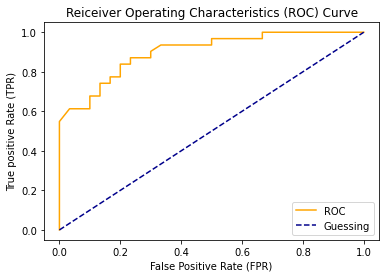

In [49]:
# Create a function for plotting ROC curve
from matplotlib import pyplot as plt # or import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plot a roc curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    #plot the toc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    
    #plot the line with no predictive power
    plt.plot([0 ,1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    
    #Customizing the plot
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True positive Rate (TPR)')
    plt.title('Reiceiver Operating Characteristics (ROC) Curve')
    
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [50]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predicts_positive)

0.900537634408602

In [51]:
#prediciting perfect roc and aoc curve
roc_auc_score(y_test, y_test)

1.0

In reality, a perfect ROC curve is unlikely.

#### Confusion matrix
The next way to evaluate a classification model is by using a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). 

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [52]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[25,  5],
       [ 8, 23]], dtype=int64)

In [53]:
#visulaize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=['Actual Labels'],
           colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,25,5
1,8,23


<AxesSubplot:>

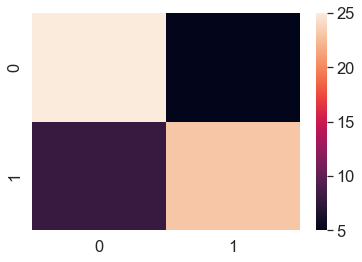

In [54]:
#make our confusion matric more visual with Seaborn's heatmap
import seaborn as sns

#set font scale
sns.set(font_scale=1.5)

#create a confusion matrix
conf_mat=confusion_matrix(y_test, y_preds)

#plot it using seaborn
sns.heatmap(conf_mat)

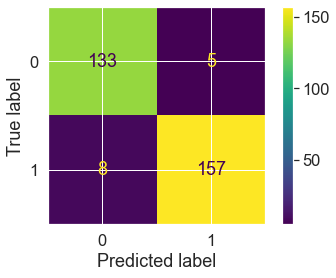

In [55]:
#another way to use heatmap
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=model, X=x, y=y);

#### Classification report

In [56]:
from sklearn.metrics import classification_report

classification_report(y_test, y_preds)

'              precision    recall  f1-score   support\n\n           0       0.76      0.83      0.79        30\n           1       0.82      0.74      0.78        31\n\n    accuracy                           0.79        61\n   macro avg       0.79      0.79      0.79        61\nweighted avg       0.79      0.79      0.79        61\n'

In [57]:
#Where precision and reall become valuable
disease_true = np.zeros(10000)
disease_true[1]= 1

disease_preds = np.zeros(10000) #model predict every single case 0
pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

D:\Installed Soft\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Installed Soft\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Installed Soft\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


This is why we need diff evaluation matrix,

here our prediction for 1 is 0, still we got an accuracy of .99

but macro avg, shown it that true prediction is 0.49

#### Regression metrics

For:
* R^2 we can use [`r2_score()` or `coefficient of determination`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
* MAE (mean absolute error) we can use [`mean_absolute_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)
* MSE (mean squared error) we can use [`mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

#### coefficient of determination

In [58]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()

x=housing_df.drop('target', axis=1)
y=housing_df['target']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model.fit(x_train, y_train)

RandomForestRegressor()

In [59]:
model.score(x_test, y_test)

0.8165970515005213

#### MAE (Mean Absolute Error) we can use mean_absolute_error()
- ##### MEA is the absolute differences between predictions and actual values.
- ##### it gives you an idea of how worng your models prediction are

In [60]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mea = mean_absolute_error(y_test, y_preds)
mea

0.3288163656976746

In [61]:
df=pd.DataFrame({'Actual Value':y_test,
               'Predicted Value':y_preds})
df['Differences']=df['Actual Value'] - df['Predicted Value']
df.head(10)

,Actual Value,Predicted Value,Differences
5626,1.601,1.697450,-0.096450
8463,2.021,2.161580,-0.140580
18239,1.813,2.125100,-0.312100
12156,1.773,1.740030,0.032970
15362,2.633,2.376320,0.256680
18302,2.650,2.412500,0.237500
20212,2.997,3.147030,-0.150030
11646,2.346,2.436870,-0.090870
8303,4.615,3.581692,1.033308
12854,0.938,1.135160,-0.197160


In [62]:
np.array(y_test)

array([1.601, 2.021, 1.813, ..., 0.44 , 1.051, 0.815])

In [63]:
y_preds

array([1.69745, 2.16158, 2.1251 , ..., 0.58239, 1.46701, 0.93282])

In [64]:
df['Differences'].mean() , np.abs(df['Differences']).mean()

(-0.020369029360464683, 0.3288163656976734)

#### MSE(Mean Square Error)
- ##### MSE is mean square of thr errors between actual and predited values

In [65]:
#Mean square error
from sklearn.metrics import mean_squared_error

y_preds=model.predict(x_test)
mse=mean_squared_error(y_test, y_preds)
mse

0.24637879389071063

In [66]:
df['Mean Square Error']=np.square(y_test-y_preds)
df

,Actual Value,Predicted Value,Differences,Mean Square Error
5626,1.601,1.69745,-0.09645,0.009303
8463,2.021,2.16158,-0.14058,0.019763
18239,1.813,2.12510,-0.31210,0.097406
12156,1.773,1.74003,0.03297,0.001087
15362,2.633,2.37632,0.25668,0.065885
...,...,...,...,...
10397,1.844,2.24917,-0.40517,0.164163
13685,1.402,2.94030,-1.53830,2.366367
18824,0.440,0.58239,-0.14239,0.020275
16193,1.051,1.46701,-0.41601,0.173064


In [67]:
df_copy_error=df
df_copy_error['Mean Square Error'].iloc[1:100] = 20 

In [68]:
df_copy_error['Mean Square Error'].mean()

0.7220707862978216

here because we have chaneged some data from dataset the mean square error increase a lot.
to prevent it we generally removed the outlier

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model=RandomForestClassifier(n_estimators=100)
np.random.seed(10)

x=heart_disease.drop('target', axis=1)
y=heart_disease['target']

In [70]:
#Cross-validation accuracy
cv_acc=cross_val_score(model, x, y, scoring=None)
cv_acc

array([0.83606557, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

#### if scoring=None,Estimator default scoring evaluation metrics will be used(accuracy for classification model)

In [71]:
#Cross-validation accuracy
print(f'The cross-validation accuracy is {np.mean(cv_acc)*100:.2f}%')

The cross-validation accuracy is 81.49%


In [72]:
np.random.seed(10)
cv_acc = cross_val_score(model, x, y, scoring='accuracy')
cv_acc

array([0.83606557, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [73]:
#Cross-validation accuracy
print(f'The cross-validation accuracy is {np.mean(cv_acc)*100:.2f}%')

The cross-validation accuracy is 81.49%


In [74]:
np.random.seed(10)
cv_pre = cross_val_score(model, x, y, scoring='precision')
cv_pre

array([0.82857143, 0.90322581, 0.84375   , 0.79411765, 0.75675676])

In [75]:
#Cross-validation precision
print(f'The cross-validation precision is {np.mean(cv_pre)}')

The cross-validation precision is 0.8252843277677243


In [76]:
#recall
cv_rec = cross_val_score(model, x, y, scoring='recall')
cv_rec

array([0.84848485, 0.87878788, 0.81818182, 0.84848485, 0.90909091])

In [77]:
#Cross-validation recall
print(f'The cross-validation recall is {np.mean(cv_rec)}')

The cross-validation recall is 0.8606060606060606


##### for `RandomForestClassification`; we used scoring parameter as accuracy by default and other are precission and recall

##### for `RandomForestRegressor`; we used scoring parameter as coefficient of determination (r^2) by default and other are neg_mean_squared_error and neg_mean_absolute_error

### Let's use `scoring` for regression problem

In [78]:
housing_df.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526


In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

np.random.seed(10)

model = RandomForestRegressor(n_estimators=100)
x=housing_df.drop('target',axis=1)
y=housing_df['target']

In [80]:
np.random.seed(10)
cv_r2 = cross_val_score(model, x, y, cv=3, scoring=None)
cv_r2

array([0.62863182, 0.72643769, 0.61800546])

In [81]:
#Mean square error
cv_mse = cross_val_score(model, x, y, cv=3, scoring='neg_mean_squared_error')
np.mean(cv_mse)

-0.4563620811786114

In [82]:
#Mean absolute error
cv_mae = cross_val_score(model, x, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-0.4815363270687986

#### 4.3 using different evaluation metrics as Scikit-Learn fucntions
The 3rd way to use sklearn-learn machine learning models/estimators is to use `sklearn.metrics` 

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

model = RandomForestClassifier()

np.random.seed(2)

x=heart_disease.drop('target', axis=1)
y=heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print(f'The Accuracy score is {accuracy_score(y_test,y_predict)*100:.2f}%')
print(f'The Recall score is {recall_score(y_test,y_predict)*100:.2f}%')
print(f'The Precission score is {precision_score(y_test,y_predict)*100:.2f}%')
print(f'The f1 score is {f1_score(y_test,y_predict)*100:.2f}%')

The Accuracy score is 88.52%
The Recall score is 96.55%
The Precission score is 82.35%
The f1 score is 88.89%


In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

model2=RandomForestRegressor(n_estimators=100)

x=housing_df.drop('target', axis=1)
y=housing_df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model2.fit(x_train, y_train)
y2_predict = model2.predict(x_test)

print('Regression metrics on the test set')
print(f'The R2 score is {r2_score(y_test, y2_predict)}')
print(f'The MAE score is {mean_absolute_error(y_test, y2_predict)}')
print(f'The MSE score is {mean_squared_error(y_test, y2_predict)}')

Regression metrics on the test set
The R2 score is 0.8186618136733735
The MAE score is 0.31917229709302336
The MSE score is 0.23797587481713217


#### 5.Improving a model
First Prediction = BaseLine Prediction

First Model = BaseLine Model

From a data perspective asks:
* Could we collect more data? In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.
* Could we improve our data? This could mean filling in misisng values or finding a better encoding (turning things into numbers) strategy.

From a model perspective asks:
* Is there a better model we could use? If you've started out with a simple model, could you use a more complex one? (we saw an example of this when looking at the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), ensemble methods are generally considered more complex models)
* Could we improve the current model? If the model you're using performs well straight out of the box, can the **hyperparameters** be tuned to make it even better?

#### Parameters: model find these pattern in data
#### Hyper-parameters: setting we do in model to increase in efficiency to find pattern

#### Three Ways to adjust Hyper-parameters:
- By Hand
- Randomly with RandomSVC
- Exhaustively with SearchCV

In [85]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [86]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 5.1Tunning Hyperparameters by Hand
let's make 3set:
- `Training`
- `Validation1`
- `Testing`

In [87]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### We are going to try :
- `max_depth`
- `max_features`
- `min_samples_leaf`
- `min_samples_split`
- `n_estimators`   

In [88]:
def predict_fun(y_test, y_preds):
    """
    Performances evaluation comparision on y_true labels vs y_preds label
    
    """
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    
    metric_dict = {'accuracy': round(accuracy, 2),
                  'precision': round(precision, 2),
                  'recall': round(recall, 2),
                  'f1_score':round(f1, 2)}
    print(f'accuracy: {accuracy * 100:.2f}%')
    print(f'precision: {precision:.2f}')    
    print(f'recall: {recall:.2f}')
    print(f'f1_score: {f1:.2f}')
    
    return metric_dict

In [89]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(10)

df=pd.read_csv('heart-disease.csv')

# shuffling the data
df_shuffled = df.sample(frac=1)

# split in X & Y
x = df_shuffled.drop('target', axis=1)
y=df_shuffled['target']

#split the data into train, validation and test sets
train_split = round(0.7 * len(df)) # 70% of data
valid_split = round(train_split + 0.15 * len(df)) # 70% + 15% of data

x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test , y_test = x[valid_split:] , y[valid_split:]

#len(x_train), len(x_valid), len(x_test)

# make baseline prediction
model.fit(x_train, y_train)
y_preds = model.predict(x_valid)

# Evaluate the classifier on validation sets
baseline_metrices = predict_fun(y_valid, y_preds)
baseline_metrices

accuracy: 84.44%
precision: 0.91
recall: 0.81
f1_score: 0.86


{'accuracy': 0.84, 'precision': 0.91, 'recall': 0.81, 'f1_score': 0.86}

In [90]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [91]:
np.random.seed(10)

model2=RandomForestClassifier(n_estimators=1000)

model.fit(x_train, y_train)

y_preds2 = model.predict(x_valid)

metrices_score2 = predict_fun(y_valid, y_preds2)

accuracy: 75.56%
precision: 0.83
recall: 0.73
f1_score: 0.78


#### 5.2 Hyper-parameters tunning with RandomizedSearchCV

#### Not Working

In [92]:
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators": [10 ,100 , 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_sample_split": [2, 4, 6],
       "min_sample_leaf": [1, 2, 4]}

np.random.seed(100)

#split into x & y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#spli into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#instantiate RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1) # n_jobs mean how many computer processer you want to use, -1 mean 100%

#setup RandimizedSearchCV
rs_model = RandomizedSearchCV(estimator=model,
                             param_distributions=grid,
                             n_iter=10, #n_iter mean num of model to try
                             cv=5,
                             verbose=2)
#fit the randimizedSearchCV version with model
rs_model.fit(x_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


ValueError: Invalid parameter min_sample_split for estimator RandomForestClassifier(n_estimators=1200, n_jobs=-1). Check the list of available parameters with `estimator.get_params().keys()`.